In [1]:
%pylab widget
%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
# Read the mhd file from data
from fastcat import patient_data
import fastcat as fc
import numpy as np

In [14]:
nrrd_file = '/media/jericho/T7/dfci_laptop_backup/Documents/christian_patient_data/BRAIN/2_Stereo_CNS_Scan.nrrd'
# nrrd_file = '/home/jericho/Software/fastcat/examples/patient_data/data/smaller_volume_CNS_CT.nrrd'

fc.utils.nrrd_to_mhd(nrrd_file,force=True)

[2024-03-26 16:15:50,771] {utils.py:494} INFO - Directory 2_Stereo_CNS_Scan already exists, but is being overwriten
[2024-03-26 16:15:51,961] {utils.py:575} INFO - The spacing is [[0.       0.       1.25    ]
 [0.       0.761719 0.      ]
 [0.761719 0.       0.      ]]
[2024-03-26 16:15:51,962] {utils.py:576} INFO - The origin is [-229.5 -195.  -195. ]
[2024-03-26 16:15:51,962] {utils.py:577} INFO - The shape is (296, 512, 512)
[2024-03-26 16:15:54,058] {utils.py:368} INFO - Loading density data from file
[2024-03-26 16:15:54,062] {utils.py:696} INFO -     Saved SchneiderMaterialsWeight1 atten to file in data/mu_over_rho/SchneiderMaterialsWeight1.csv
[2024-03-26 16:15:54,062] {utils.py:368} INFO - Loading density data from file
[2024-03-26 16:15:54,065] {utils.py:696} INFO -     Saved SchneiderMaterialsWeight2 atten to file in data/mu_over_rho/SchneiderMaterialsWeight2.csv
[2024-03-26 16:15:54,065] {utils.py:368} INFO - Loading density data from file
[2024-03-26 16:15:54,068] {utils.py

In [15]:
phantom = patient_data.patient_phantom(nrrd_file, 1e8)

[2024-03-26 16:16:00,433] {patient_data.py:164} INFO - Found existing directory. Using mhd file 2_Stereo_CNS_Scan_phantom.mhd


[2024-03-26 16:16:00,702] {utils.py:107} INFO - Using default geometry, DSD = 1510, nDetector = [512, 512], dDetector = [0.784, 0.784]
[2024-03-26 16:16:00,703] {utils.py:368} INFO - Loading density data from file
[2024-03-26 16:16:00,704] {utils.py:425} INFO -     Air atten file already exists, skipping...
[2024-03-26 16:16:00,705] {utils.py:425} INFO -     polyurethane atten file already exists, skipping...
[2024-03-26 16:16:00,705] {utils.py:425} INFO -     teflon atten file already exists, skipping...
[2024-03-26 16:16:00,705] {utils.py:425} INFO -     pmp atten file already exists, skipping...
[2024-03-26 16:16:00,706] {utils.py:425} INFO -     bone50 atten file already exists, skipping...
[2024-03-26 16:16:00,706] {utils.py:425} INFO -     ldpe atten file already exists, skipping...
[2024-03-26 16:16:00,706] {utils.py:425} INFO -     polystyrene atten file already exists, skipping...
[2024-03-26 16:16:00,707] {utils.py:425} INFO -     acrylic atten file already exists, skipping..

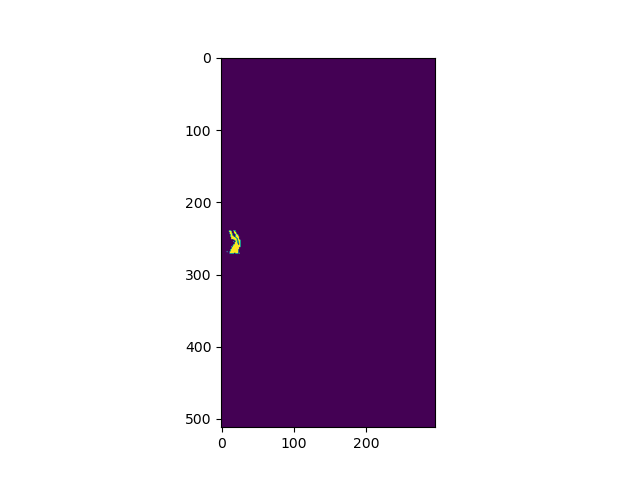

In [45]:
import matplotlib.pyplot as plt
import mpl_interactions as pli

plt.figure()
pli.hyperslicer(phantom.phantom)

In [ ]:
def show_nrrd_mhd(phantom, crop = [0, 0, 0, 0, 0, 0], isocenter = [0, 0, 0]):
    
    # Load the nrrd file
    phantom.nrrd_to_mhd()
    phantom_temp = phantom.phantom.copy()
    
    plt.figure()
    plt.subplot(121)
    plt.imshow(phantom.data[isocenter[0]]
    plt.subplot(122)
    plt.imshow(phantom.data[:,isocenter[1],:])


In [16]:
spectrum = fc.calculate_spectrum_sp(120,12)
spectrum.filter('Al', 4)
spectrum.write_dat_file('spectrum.dat')

In [17]:
phantom.initialize_fastmc(3,spectrum)

[2024-03-26 16:16:08,716] {patient_data.py:236} INFO - Making a list of angles
[2024-03-26 16:16:08,717] {fastmc_scatter.py:68} INFO - Full fan mode - for flood field


[2024-03-26 16:16:08,721] {fastmc_scatter.py:120} INFO - Saving simulation parameters to /home/jericho/Software/fastcat/fastcat/data/user_phantoms/2_Stereo_CNS_Scan/fastmc_simulation_12/fastmc_1e08_3angles.pkl
[2024-03-26 16:16:22,925] {fastmc_scatter.py:125} INFO - Done saving simulation parameters to /home/jericho/Software/fastcat/fastcat/data/user_phantoms/2_Stereo_CNS_Scan/fastmc_output_13/fastmc_00.0_flood.pkl
[2024-03-26 16:16:22,926] {fastmc_scatter.py:14} INFO - Full fan mode - for projections


In [20]:
phantom2 = patient_data.patient_phantom(nrrd_file, reload=True, sim_num=13)

[2024-03-26 16:18:47,096] {patient_data.py:59} INFO - Reloading phantom
[2024-03-26 16:18:47,097] {patient_data.py:61} INFO - Found existing directory. Using mhd file 2_Stereo_CNS_Scan_phantom.mhd
[2024-03-26 16:18:47,097] {patient_data.py:63} INFO - Reloading phantom from pickle file 2_Stereo_CNS_Scan


[2024-03-26 16:18:47,527] {patient_data.py:86} INFO - Phantom loaded from pickle file fastmc_1e08_3angles.pkl
[2024-03-26 16:18:47,528] {patient_data.py:91} INFO - Loading ggems files
[2024-03-26 16:18:47,530] {patient_data.py:117} INFO - Using the first detector layer ggems files
[2024-03-26 16:18:47,603] {patient_data.py:151} INFO - ggems files loaded
[2024-03-26 16:18:47,604] {patient_data.py:152} INFO -     Scatter files:
[2024-03-26 16:18:47,604] {patient_data.py:155} INFO -         /home/jericho/Software/fastcat/fastcat/data/user_phantoms/2_Stereo_CNS_Scan/fastmc_output_13/fastmc_0.00-scatter.mhd
[2024-03-26 16:18:47,604] {patient_data.py:155} INFO -         /home/jericho/Software/fastcat/fastcat/data/user_phantoms/2_Stereo_CNS_Scan/fastmc_output_13/fastmc_120.00-scatter.mhd
[2024-03-26 16:18:47,604] {patient_data.py:155} INFO -         /home/jericho/Software/fastcat/fastcat/data/user_phantoms/2_Stereo_CNS_Scan/fastmc_output_13/fastmc_240.00-scatter.mhd


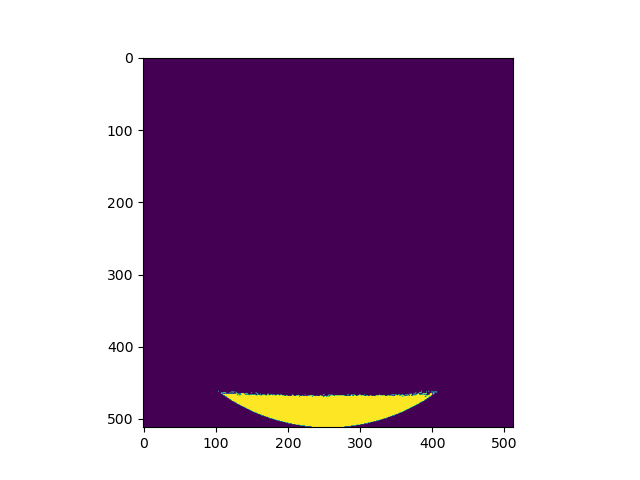

In [48]:
plt.figure()
pli.hyperslicer(phantom.phantom)

In [18]:
phantom.run_fastmc(fastmc_path ='/home/jericho/Downloads/FastMC_Jan_05/FastMC_install/bin/FastMC')

[2024-03-26 16:16:27,973] {fastmc_scatter.py:144} INFO - Running fastmc_0.00.fmc


Read Parameters..../home/jericho/Software/fastcat/fastcat/data/user_phantoms/2_Stereo_CNS_Scan/fastmc_simulation_12/fastmc_0.00.fmc
[FastMC] Reading bowtie file /home/jericho/Software/fastcat/fastcat/data/bowties/full_fan_alt.dat
[FastMC] Filter material found: Al
[FastMC] Al attenuation values loaded [43]
[FastMC] Al density: 2.699 g/cm3
[FastMC] Al filter start angle: -15 deg
[FastMC] Al thickness values: 30
Reading Materials file.../home/jericho/Software/fastcat/fastcat/data/user_phantoms/2_Stereo_CNS_Scan/2_Stereo_CNS_Scan_materials.txt
[GGEMS GGEMSVolumeCreatorManager::WriteRangeToMaterialFile](0) List of label and material:
[GGEMS GGEMSVolumeCreatorManager::WriteRangeToMaterialFile](0)     * Material: Tungsten, label: 0.000000e+00
[GGEMS GGEMSVolumeCreatorManager::WriteRangeToMaterialFile](0) List of label and material:
[GGEMS GGEMSVolumeCreatorManager::WriteRangeToMaterialFile](0)     * Material: Tungsten, label: 0.000000e+00
[GGEMS GGEMSVolumeCreatorManager::WriteRangeToMateria

In [21]:
phantom2.run_fastcat(1e10,3)

[2024-03-26 16:19:11,906] {patient_data.py:322} INFO - Making a list of angles
[2024-03-26 16:19:11,908] {patient_data.py:350} INFO - Detector matching specifications: CsI-784-micrometer
[2024-03-26 16:19:11,913] {ggems_simulate.py:227} INFO - Initializing filter /home/jericho/Software/fastcat/fastcat/data/bowties/full_fan_alt.dat
[2024-03-26 16:19:13,447] {ggems_simulate.py:626} INFO - Running Simulations
[2024-03-26 16:19:13,447] {ggems_simulate.py:654} INFO -     Simulating 10 keV
[2024-03-26 16:19:14,040] {ggems_simulate.py:654} INFO -     Simulating 20 keV
[2024-03-26 16:19:14,585] {ggems_simulate.py:654} INFO -     Simulating 30 keV
[2024-03-26 16:19:15,141] {ggems_simulate.py:654} INFO -     Simulating 40 keV
[2024-03-26 16:19:15,707] {ggems_simulate.py:654} INFO -     Simulating 50 keV
[2024-03-26 16:19:16,326] {ggems_simulate.py:654} INFO -     Simulating 60 keV
[2024-03-26 16:19:16,887] {ggems_simulate.py:654} INFO -     Simulating 70 keV
[2024-03-26 16:19:17,445] {ggems_simu

In [53]:
phantom2.correct_intensity(ml=False)

In [25]:
phantom.phantom.shape

(9, 300, 345)

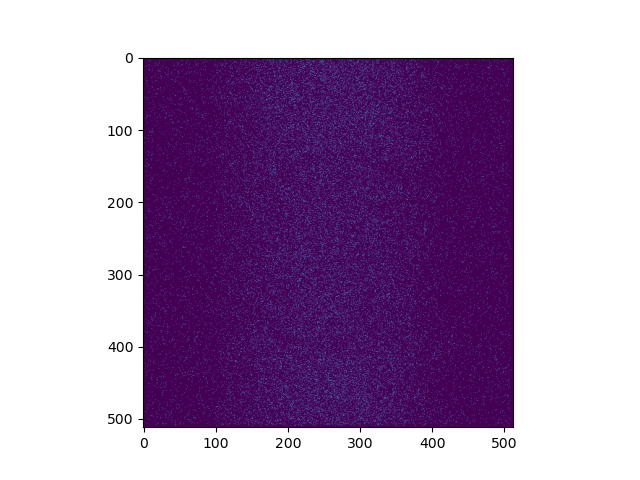

In [24]:
plt.figure()
plt.imshow(phantom2.ggems_primary_projections[0])

/tmp/ipykernel_45180/2055442482.py:11: RuntimeWarning: divide by zero encountered in divide
  proj1 = -np.log(int1/np.rot90(phantom2.ggems_flood))


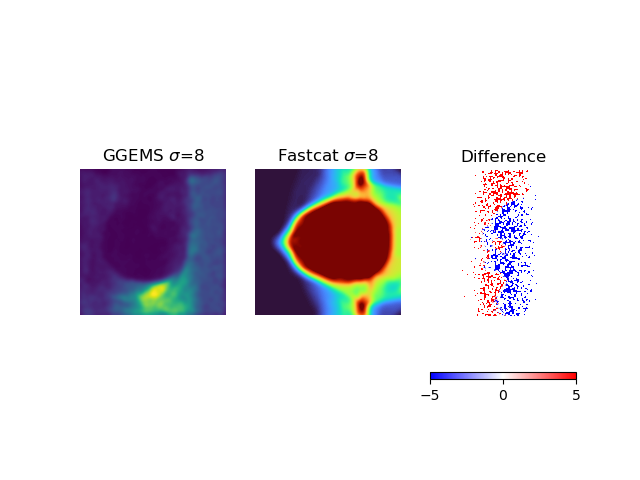

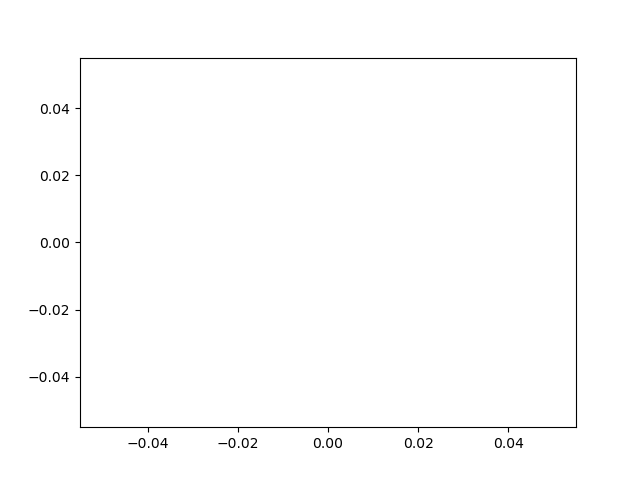

In [24]:
import matplotlib.pyplot as plt

plt.figure()
plt.subplot(131)

from scipy.ndimage import gaussian_filter
filt_sigma = 8
int1 = gaussian_filter(phantom2.ggems_primary_projections[2],filt_sigma)
int2 = gaussian_filter(phantom2.intensity[0],filt_sigma)

proj1 = -np.log(int1/np.rot90(phantom2.ggems_flood))
proj2 = -np.log(int2/phantom2.flood_field)
# gaussian blur the projections using scipy ndimage 

crop = 20

plt.imshow(int1)
plt.axis('off')
plt.title(f'GGEMS $\sigma$={filt_sigma}')
plt.subplot(132)
plt.imshow(proj2[crop:-crop,crop:-crop],cmap='turbo',vmin=0,vmax=4)
plt.axis('off')
plt.title(f'Fastcat $\sigma$={filt_sigma}')

# Plot the difference 
plt.subplot(133)
diff_1 = 100*(proj1[crop:-crop,crop:-crop]-proj2[crop:-crop,crop:-crop])/4
plt.axis('off')
plt.title('Difference')
plt.imshow(diff_1,cmap='bwr',vmin=-5,vmax=5)
plt.colorbar(orientation='horizontal')

# plot the mean of the difference image along both axes
plt.figure()
plt.plot(np.mean(diff_1,axis=0))
plt.plot(np.mean(diff_1,axis=1))

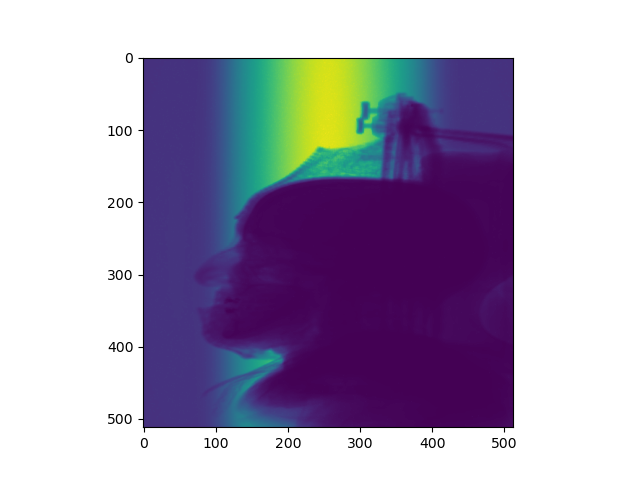

In [8]:
import matplotlib.pyplot as plt
import mpl_interactions as pli

plt.figure()
pli.hyperslicer(phantom.intensity)

In [ ]:
# Read the mhd file from data
from fastcat.ggems_scatter import generate_ggems_bash_script
import fastcat as fc
import numpy as np
from fastcat.fastmc_scatter import write_fastmc_xml_file, run_fastmc_files, write_fastmc_flood_field_xml_file

out_file = '/home/jericho/1-Workspace/1-jupyter_notebooks/2-fastcat_ggems/test'

# 1024 * 768 is the real resolution of the detector

range_file = '/home/jericho/1-Workspace/fastcat_gate/Catphan604_Range.txt'
mhd_file = '/home/jericho/1-Workspace/fastcat_gate/Catphan604.mhd'
material_file = '/home/jericho/1-Workspace/fastcat_gate/Materials.txt'
# material_file = '/home/jericho/1-Workspace/fastcat_ggems/custom_materials_gate.txt'
spectrum_file = '/home/jericho/1-Workspace/1-jupyter_notebooks/4-preliminary_fastmc_projections/spectrum_120kVp_2.75mmAl_0.89mmTi.dat'
# spectrum_file = '/home/jericho/Downloads/FastMC_Jan_05/FastMC_install/bin/data/120kV_2.5mmAl.dat'
# range_file = '/home/jericho/1-Workspace/fastcat_gate/Catphan604_Range.txt'
bowtie_file = '/home/jericho/Downloads/firefox-downloads/full_fan_alt.dat'

# nparticles = 1000000  # 000
out = 'out'

s = fc.Spectrum()
s.load(spectrum_file=spectrum_file)
spectrum = spectrum_file
s_max = s.x.max()

Catphan604_phantom = fc.utils.get_phantom_from_mhd(
    mhd_file, range_file, material_file)

Catphan604_phantom.detector_thickness = 0.6
Catphan604_phantom.detector_thickness2 = 0.8
Catphan604_phantom.detector_material = 'CsI'
Catphan604_phantom.nparticles_per_angle = int(1e10)  # 00 #00
Catphan604_phantom.bowtie_file = bowtie_file
Catphan604_phantom.spectrum_file = spectrum_file
Catphan604_phantom.material_file = material_file
Catphan604_phantom.mhd_file = mhd_file
Catphan604_phantom.range_file = range_file

file_base = '/home/jericho/1-Workspace/1-jupyter_notebooks/4-preliminary_fastmc_projections/test/'
angles = np.linspace(0, np.pi*2, 10, endpoint=False)
fnames = []

Catphan604_phantom.sim_angles = angles
out_dir = '/home/jericho/1-Workspace/1-jupyter_notebooks/4-preliminary_fastmc_projections/out_dir'
sim_dir = '/home/jericho/1-Workspace/1-jupyter_notebooks/4-preliminary_fastmc_projections/sim_dir'

write_fastmc_flood_field_xml_file(phantom=Catphan604_phantom, out_dir=out_dir, sim_dir=sim_dir,
                                  file_name=file_base, half_fan=False)

write_fastmc_xml_file(phantom=Catphan604_phantom, out_dir=out_dir, sim_dir=sim_dir,
                      file_name=file_base, half_fan=False)

run_fastmc_files(
    lib_path='/home/jericho/Downloads/FastMC_Jan_05/FastMC_install/bin/FastMC', sim_dir=sim_dir)